<a href="https://colab.research.google.com/github/ShankarChavan/synthetic-data-generation/blob/main/SyntheticDataVault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDV (Synthetic Data Vault)

The **Synthetic Data Vault** (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data

# Download and Install SDV

In [1]:
pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.2/143.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.7 MB/s eta 0:00:00


In [ ]:
import sdv

print(sdv.version.public)

1.10.0


# Loading the demo data

In [2]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

**Details**: The data is available as a single table.
- `guest_email` is a _primary key_ that uniquely identifies every row
- Other columns have a variety of data types and some the data may be missing.

In [3]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


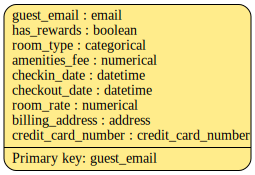

In [4]:
metadata.visualize()

**Auto Detect Metadata** :
Automatically detect the metadata based on your actual data.

In [5]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [6]:
metadata.detect_from_dataframe(real_data)

In [7]:
metadata

{
    "columns": {
        "guest_email": {
            "sdtype": "email",
            "pii": true
        },
        "has_rewards": {
            "sdtype": "categorical"
        },
        "room_type": {
            "sdtype": "categorical"
        },
        "amenities_fee": {
            "sdtype": "numerical"
        },
        "checkin_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "checkout_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "room_rate": {
            "sdtype": "numerical"
        },
        "billing_address": {
            "sdtype": "unknown",
            "pii": true
        },
        "credit_card_number": {
            "sdtype": "credit_card_number",
            "pii": true
        }
    },
    "primary_key": "guest_email",
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

# Single Table Data


## Fast ML Preset

Fast ML Preset synthesizer is optimized for modeling speed

In [8]:
from sdv.lite import SingleTablePreset

fast_ml_synthesizer = SingleTablePreset(metadata, name='FAST_ML')
fast_ml_synthesizer.fit(real_data)

fast_ml_synthetic_data = fast_ml_synthesizer.sample(num_rows=10)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:79: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [9]:
fast_ml_synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': False,
 'locales': None,
 'numerical_distributions': {},
 'default_distribution': 'norm'}

In [10]:
fast_ml_synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,DELUXE,10.385184,03 Apr 2020,23 Apr 2020,149.354932,sdv-pii-q0g03,5161033759518983
1,steven59@example.org,False,BASIC,NaN,04 Jul 2020,24 Aug 2020,179.634314,sdv-pii-hr6mb,4133047413145475690
2,brandon15@example.net,False,BASIC,22.700956,20 Apr 2020,14 Apr 2020,145.658788,sdv-pii-vy4n9,4977328103788
3,humphreyjennifer@example.net,False,BASIC,23.497404,20 May 2020,05 Jun 2020,187.945019,sdv-pii-4xdjt,3524946844839485
4,joshuabrown@example.net,False,DELUXE,20.162318,05 Jan 2020,07 Jan 2020,190.691273,sdv-pii-p73w1,4446905799576890978


Save and load

In [11]:
fast_ml_synthesizer.save(
    filepath='fast_ml_synthesizer.pkl'
)

fast_ml_synthesizer = SingleTablePreset.load(
    filepath='fast_ml_synthesizer.pkl'
)

## Gaussian Coupla

We'll use the Gaussian Copula algorithm to do this. Gaussian Copula is a fast, customizable and transparent way to synthesize data.

### Creating a Synthesizer

In [12]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

Other Parameters that can we used and is not manadatory

In [13]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': None,
 'numerical_distributions': {},
 'default_distribution': 'beta'}

**Generate synthetic data** : Use the sample function and pass in any number of rows to synthesize.

In [14]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.34,26 Mar 2020,11 Apr 2020,119.53,sdv-pii-q0g03,5161033759518983
1,steven59@example.org,False,DELUXE,NaN,02 Jul 2020,14 Sep 2020,174.70,sdv-pii-hr6mb,4133047413145475690
2,brandon15@example.net,False,BASIC,22.08,30 Mar 2020,17 Mar 2020,148.34,sdv-pii-vy4n9,4977328103788
3,humphreyjennifer@example.net,False,BASIC,8.18,03 May 2020,22 May 2020,177.51,sdv-pii-4xdjt,3524946844839485
4,joshuabrown@example.net,False,SUITE,7.69,13 Jan 2020,10 Jan 2020,187.93,sdv-pii-p73w1,4446905799576890978


### Evaluating Real vs. Synthetic Data

SDV has built-in functions for evaluating the synthetic data and getting more insight.

As a first step, we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:

- All primary keys must be unique
- Continuous values must adhere to the min/max of the real data
- Discrete columns (non-PII) must have the same categories as the real data
- Etc.



In [15]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 144.91it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


<font color="green"><b>The score is 100%</b></font>, indicating that the data is fully valid.

We can also measure the **data quality** or the statistical similarity between the real and synthetic data. This value may vary anywhere from 0 to 100%.

In [16]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 72.91it/s]

Overall Score: 88.7%

Properties:
- Column Shapes: 89.11%
- Column Pair Trends: 88.3%


In [17]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.986000
1,room_type,TVComplement,0.968000
2,amenities_fee,KSComplement,0.717449
3,checkin_date,KSComplement,0.970000
4,checkout_date,KSComplement,0.975000
5,room_rate,KSComplement,0.730000


### Visualising Data
Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [18]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)

fig.show()

We can also visualize in 2D, comparing the correlations of a pair of columns.

In [19]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)

fig.show()

### Customize
A key benefit of using the Gaussian Copula is customization and transparency. This synthesizer estimates the shape of every column using a 1D distribution. We can set these shapes ourselves.

In [20]:
custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution='truncnorm',
    numerical_distributions={
        'checkin_date': 'uniform',
        'checkout_date': 'uniform',
        'room_rate': 'gaussian_kde'
    }
)

custom_synthesizer.fit(real_data)

After training, we can inspect the distributions. In this case, the synthesizer returns the parameter it learned using the truncnorm distribution.

<font color=navy><i>More information about truncnorm distribution is available in the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html).</i></font>

In [21]:
learned_distributions = custom_synthesizer.get_learned_distributions()
learned_distributions['has_rewards']

{'distribution': 'truncnorm',
 'learned_parameters': {'a': -0.5248941600815897,
  'b': 0.47865112393557874,
  'loc': 0.5224378986937426,
  'scale': 0.9929469625853422}}

**Save and Load**

In [22]:
synthesizer.save('GaussianCopulaSynthesizer.pkl')

synthesizer = GaussianCopulaSynthesizer.load('GaussianCopulaSynthesizer.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gc_path = '/content/drive/My Drive/GaussianCopulaSynthetic.csv'
real_data_path = '/content/drive/My Drive/fake_hotel_guests.csv'

In [ ]:
with open(real_data_path, 'w') as f:
  real_data.to_csv(f)

## CTGAN

**CTGAN** uses generative adversarial networks (GANs) to create synthesize data with high fidelity.

### Creating a Synthesizer

In [23]:
from sdv.single_table import CTGANSynthesizer

ctg_synthesizer = CTGANSynthesizer(metadata)
ctg_synthesizer.fit(real_data)

In [24]:
ctg_synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': None,
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 300,
 'pac': 10,
 'cuda': True}

In [25]:
ctg_synthetic_data = ctg_synthesizer.sample(num_rows=500)
ctg_synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,28.74,2020-12-20,2020-10-26,198.59,sdv-pii-q0g03,5161033759518983
1,steven59@example.org,False,BASIC,13.06,2020-12-13,2020-01-07,94.77,sdv-pii-hr6mb,4133047413145475690
2,brandon15@example.net,False,BASIC,45.76,2020-04-29,2020-11-23,143.76,sdv-pii-vy4n9,4977328103788
3,humphreyjennifer@example.net,False,BASIC,10.85,2020-04-29,2020-12-23,87.71,sdv-pii-4xdjt,3524946844839485
4,joshuabrown@example.net,False,SUITE,NaN,2020-04-06,2020-10-23,257.88,sdv-pii-p73w1,4446905799576890978


### Evaluating Real vs. Synthetic Data

In [26]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=ctg_synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 217.98it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [27]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    ctg_synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 127.14it/s]

Overall Score: 77.34%

Properties:
- Column Shapes: 78.4%
- Column Pair Trends: 76.28%


In [28]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.794000
1,room_type,TVComplement,0.808000
2,amenities_fee,KSComplement,0.613187
3,checkin_date,KSComplement,0.904000
4,checkout_date,KSComplement,0.814758
5,room_rate,KSComplement,0.770000


### Visualising Data

In [29]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=ctg_synthetic_data,
    column_name='room_type',
    metadata=metadata
)

fig.show()

In [30]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=ctg_synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)

fig.show()

### Customize

In [31]:
custom_ctg_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=5000)
custom_ctg_synthesizer.fit(real_data)

In [32]:
synthetic_data_customized_ctg = custom_ctg_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized_ctg,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 113.10it/s]

Overall Score: 84.99%

Properties:
- Column Shapes: 86.74%
- Column Pair Trends: 83.24%


In [33]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=ctg_synthetic_data,
    column_name='room_type',
    metadata=metadata
)

fig.show()

In [34]:
custom_ctg_synthesizer.save('custom_ctg_synthesizer.pkl')

custom_ctg_synthesizer = CTGANSynthesizer.load('custom_ctg_synthesizer.pkl')

# Sequence Data ( Time Series )

We'll use the **PAR** algorithm to do this. PAR uses a neural network to create sequences.

## Loading Demo Data

In [35]:
real_data, metadata = download_demo(
    modality='sequential',
    dataset_name='nasdaq100_2019'
)

**Details**: The data is available as a single table.
- `Symbol` describes the ticker symbol of the company
- `Date` describes the point of time that the prices correspond to
-  Columns such as `Open`, `Close` and `Volume` are measurements that change daily
- Columns such `Sector` and `Industry` describe fixed, unchanging values for every company

In [36]:
real_data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing


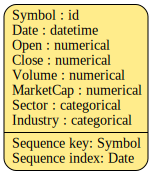

In [37]:
metadata.visualize()

A **sequence** is a set of measurements taken in a particular order, such as the Open, Close and Volume of stock prices. Some datasets have a sequence index that prescribes this order. In our case, the Date column.

In [38]:
amzn_sequence = real_data[real_data['Symbol'] == 'AMZN']
amzn_sequence

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
252,AMZN,2018-12-31,1510.800049,1501.969971,6954500,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
253,AMZN,2019-01-02,1465.199951,1539.130005,7983100,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
254,AMZN,2019-01-03,1520.010010,1500.280029,6975600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
255,AMZN,2019-01-04,1530.000000,1575.390015,9182600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
256,AMZN,2019-01-07,1602.310059,1629.510010,7993200,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
...,...,...,...,...,...,...,...,...
499,AMZN,2019-12-23,1788.260010,1793.000000,2136400,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
500,AMZN,2019-12-24,1793.810059,1789.209961,881300,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
501,AMZN,2019-12-26,1801.010010,1868.770020,6005400,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
502,AMZN,2019-12-27,1882.920044,1869.800049,6186600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution


A sequence key is a column that can be used to identify each sequence. In this case, the Symbol column. If we inspect it, we can see that it contains 100 unique values -- which means there are 100 sequences in the data.

In [39]:
real_data['Symbol'].unique()

array(['AAPL', 'AMZN', 'MSFT', 'FB', 'TSLA', 'GOOGL', 'GOOG', 'NVDA',
       'ADBE', 'PYPL', 'NFLX', 'INTC', 'CMCSA', 'PEP', 'CSCO', 'COST',
       'AVGO', 'QCOM', 'TMUS', 'TXN', 'AMGN', 'CHTR', 'SBUX', 'AMD', 'ZM',
       'INTU', 'ISRG', 'MDLZ', 'GILD', 'JD', 'BKNG', 'VRTX', 'FISV',
       'ADP', 'ATVI', 'REGN', 'MELI', 'CSX', 'AMAT', 'MU', 'LRCX', 'ADSK',
       'ILMN', 'BIIB', 'ADI', 'DOCU', 'LULU', 'MNST', 'WDAY', 'CTSH',
       'EXC', 'EBAY', 'KHC', 'EA', 'NXPI', 'BIDU', 'XEL', 'DXCM', 'SGEN',
       'CTAS', 'IDXX', 'ORLY', 'SNPS', 'ROST', 'KLAC', 'SPLK', 'CDNS',
       'NTES', 'MAR', 'VRSK', 'WBA', 'PCAR', 'ASML', 'PAYX', 'MRNA',
       'ANSS', 'XLNX', 'MCHP', 'CPRT', 'ALXN', 'ALGN', 'FAST', 'SWKS',
       'SIRI', 'VRSN', 'PDD', 'CERN', 'DLTR', 'INCY', 'MXIM', 'TTWO',
       'CDW', 'CHKP', 'CTXS', 'TCOM', 'BMRN', 'ULTA', 'EXPE', 'WDC',
       'FOXA', 'LBTYK', 'FOX', 'LBTYA'], dtype=object)

A **context** column does not change during the course of a sequence. In our case, **Sector and Industry** are context columns.

If we choose a sequence -- such as Amazon (Symbol='AMZN') -- then we'll see that the context values don't change. Amazon is always a 'Consumer Services' company.

In [40]:
real_data['Sector'].unique()

array(['Technology', 'Consumer Services', 'Capital Goods',
       'Miscellaneous', nan, 'Public Utilities', 'Health Care',
       'Consumer Non-Durables', 'Transportation', 'Consumer Durables'],
      dtype=object)

## PAR Synthesizer

**The PAR Synthesizer learns sequence information based on the context**. It's important to identify these columns ahead of time

### Creating a Synthesizer

In [41]:
from sdv.sequential import PARSynthesizer

par_synthesizer = PARSynthesizer(
    metadata,
    context_columns=['Sector', 'Industry'],
    verbose=True)

par_synthesizer.fit(real_data)

Loss (-1.409): 100%|██████████| 128/128 [02:57<00:00,  1.38s/it]


In [42]:
par_synthetic_data = par_synthesizer.sample(num_sequences=10)
par_synthetic_data.head()

100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAA,2019-01-01,183.437196,13.847729,897498,NaN,Consumer Non-Durables,Apparel
1,AAAA,2019-01-03,113.355484,207.340445,13154948,3.053923e+10,Consumer Non-Durables,Apparel
2,AAAA,2019-01-04,183.437196,122.938816,8844975,2.917024e+10,Consumer Non-Durables,Apparel
3,AAAA,2019-01-05,131.792638,132.691027,5841919,2.734260e+10,Consumer Non-Durables,Apparel
4,AAAA,2019-01-06,109.874909,125.974629,2086130,2.585892e+10,Consumer Non-Durables,Apparel


The synthesizer is generating entirely new sequences in the same format as the real data. Each sequence represents an entirely new company based on the overall patterns from the dataset. They do not map or correspond to any real company.

In [43]:
par_synthetic_data[['Symbol', 'Industry']].groupby(['Symbol']).first().reset_index()

,Symbol,Industry
0,AAAA,Apparel
1,AAAB,Automotive Aftermarket
2,AAAC,Television Services
3,AAAD,RETAIL: Building Materials
4,AAAE,Electronic Components
5,AAAF,Biotechnology: Biological Products (No Diagnos...
6,AAAG,Business Services
7,AAAH,Television Services
8,AAAI,Medical/Nursing Services
9,AAAJ,Semiconductors


In [44]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=par_synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 151.79it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [45]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    par_synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 28/28 [00:00<00:00, 30.40it/s]

Overall Score: 63.12%

Properties:
- Column Shapes: 68.51%
- Column Pair Trends: 57.73%


### Customize

In [46]:
par_custom_synthesizer = PARSynthesizer(
    metadata,
    epochs=250,
    context_columns=['Sector', 'Industry'],
    enforce_min_max_values=False,
    verbose=True)

par_custom_synthesizer.fit(real_data)

Loss (-2.266): 100%|██████████| 250/250 [05:56<00:00,  1.43s/it]


In [48]:
par_custom_synthetic_data = par_custom_synthesizer.sample(num_sequences=10)
par_custom_synthetic_data.head()

100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAA,2019-01-01,150.100039,410.258300,-179268,NaN,Consumer Non-Durables,Apparel
1,AAAA,2019-01-03,235.278082,278.773884,3331777,7.010175e+10,Consumer Non-Durables,Apparel
2,AAAA,2019-01-04,253.707791,242.112975,5847112,6.913470e+10,Consumer Non-Durables,Apparel
3,AAAA,2019-01-06,256.226347,278.299812,10971237,6.822076e+10,Consumer Non-Durables,Apparel
4,AAAA,2019-01-08,254.578786,276.340532,6454912,7.197850e+10,Consumer Non-Durables,Apparel


In [49]:
quality_report = evaluate_quality(
    real_data,
    par_custom_synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 28/28 [00:01<00:00, 22.89it/s]

Overall Score: 59.33%

Properties:
- Column Shapes: 65.65%
- Column Pair Trends: 53.01%
